# 1 - Business Problem

___Use Random Forest to prepare a model on fraud data___

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets,tree
from sklearn.tree import export_graphviz 
from sklearn import externals
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt

2 - Data collection and description

In [2]:
df = pd.read_csv("Fraud_check .csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
df.rename(columns={"Taxable.Income": "Taxable_Income"}, inplace=True)

In [4]:
df

,Undergrad,Marital.Status,Taxable_Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [5]:
# Categorize individuals based on taxable income
df['Risk_Category'] = df['Taxable_Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')

In [6]:
df.drop("Taxable_Income", axis=1, inplace=True)

In [7]:
df

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Risk_Category
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [8]:
df3 = pd.get_dummies(df, columns = ['Undergrad','Marital.Status','Urban'])

In [9]:
df1 = df.copy()

In [10]:
df1.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Risk_Category
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [11]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


In [12]:
df1.isnull().sum()

Undergrad          0
Marital.Status     0
City.Population    0
Work.Experience    0
Urban              0
Risk_Category      0
dtype: int64

In [13]:
df1.dtypes

Undergrad          object
Marital.Status     object
City.Population     int64
Work.Experience     int64
Urban              object
Risk_Category      object
dtype: object

In [14]:
df1 = pd.get_dummies(df1, columns = ['Undergrad','Marital.Status','Urban'])

# Finding Correlation

In [15]:
corr = df1.corr()

C:\Users\BALU\AppData\Local\Temp\ipykernel_9864\1630763350.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df1.corr()


In [16]:
corr

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
City.Population,1.000000,0.013135,-0.079579,0.079579,0.004925,-0.007035,0.002087,0.040098,-0.040098
Work.Experience,0.013135,1.000000,0.005362,-0.005362,-0.014833,0.033347,-0.018123,0.094559,-0.094559
Undergrad_NO,-0.079579,0.005362,1.000000,-1.000000,0.045101,-0.015120,-0.028883,-0.000267,0.000267
Undergrad_YES,0.079579,-0.005362,-1.000000,1.000000,-0.045101,0.015120,0.028883,0.000267,-0.000267
Marital.Status_Divorced,0.004925,-0.014833,0.045101,-0.045101,1.000000,-0.468757,-0.510435,0.065518,-0.065518
Marital.Status_Married,-0.007035,0.033347,-0.015120,0.015120,-0.468757,1.000000,-0.520317,-0.016771,0.016771
Marital.Status_Single,0.002087,-0.018123,-0.028883,0.028883,-0.510435,-0.520317,1.000000,-0.047014,0.047014
Urban_NO,0.040098,0.094559,-0.000267,0.000267,0.065518,-0.016771,-0.047014,1.000000,-1.000000
Urban_YES,-0.040098,-0.094559,0.000267,-0.000267,-0.065518,0.016771,0.047014,-1.000000,1.000000


<Axes: >

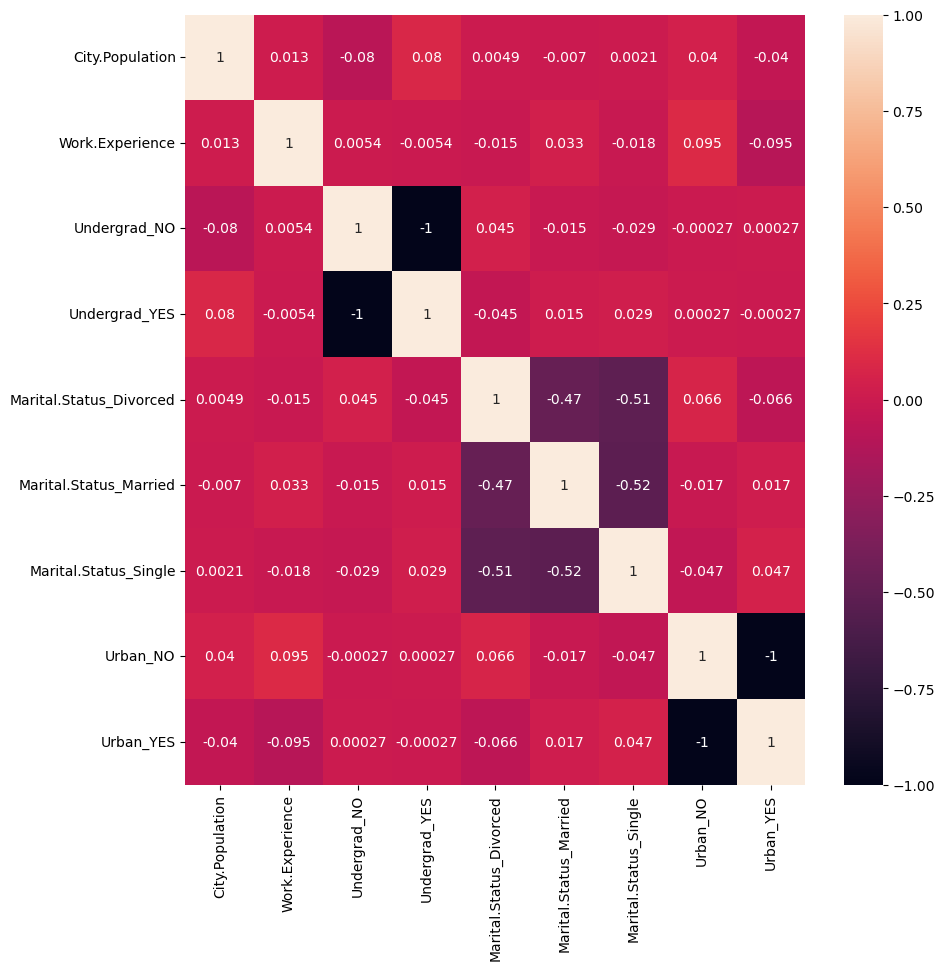

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [18]:
df1.columns

Index(['City.Population', 'Work.Experience', 'Risk_Category', 'Undergrad_NO',
       'Undergrad_YES', 'Marital.Status_Divorced', 'Marital.Status_Married',
       'Marital.Status_Single', 'Urban_NO', 'Urban_YES'],
      dtype='object')

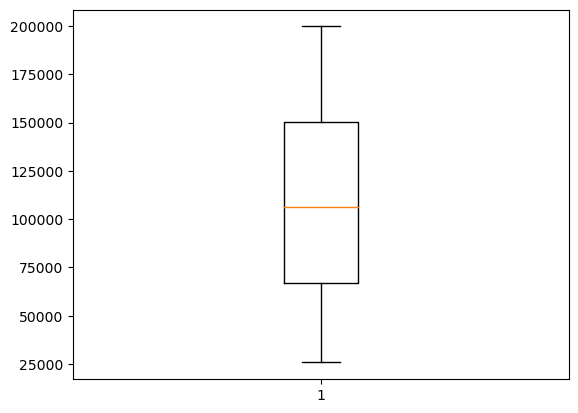

In [22]:
plt.boxplot([df1["City.Population"]])
plt.show()

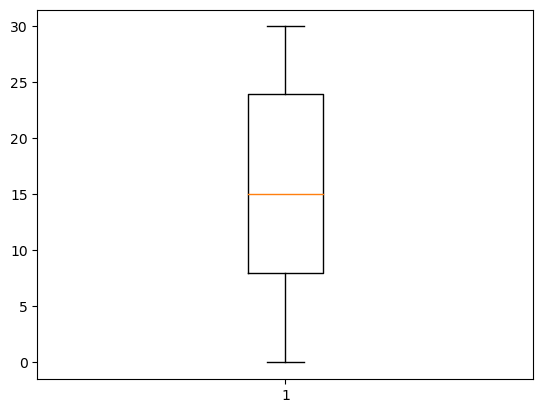

In [23]:
plt.boxplot([df1["Work.Experience"]])
plt.show()

# 3 - Random Forest Model

In [19]:
X = df3.drop("Risk_Category", axis=1)
y = df3["Risk_Category"]

In [20]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [21]:
y_train.value_counts()

Good     375
Risky    105
Name: Risk_Category, dtype: int64

In [22]:
model =RF(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
model.fit(x_train,y_train)
model.oob_score_

0.7166666666666667

In [23]:
pred_train = model.predict(x_train)

In [24]:
accuracy_score(y_train,pred_train)

1.0

In [25]:
confusion_matrix(y_train,pred_train)

array([[375,   0],
       [  0, 105]], dtype=int64)

In [26]:
pred_test = model.predict(x_test)

In [27]:
accuracy_score(y_test,pred_test)

0.775

In [28]:
print(confusion_matrix(y_test,pred_test))

[[92  9]
 [18  1]]


In [29]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [30]:
df_t

,Actual,Predicted
214,Good,Good
50,Good,Good
482,Good,Good
185,Good,Risky
346,Risky,Risky
...,...,...
231,Good,Good
371,Good,Good
564,Good,Good
216,Good,Good


In [31]:
model.feature_importances_

array([0.50530714, 0.36968144, 0.01606418, 0.01657123, 0.01764757,
       0.02069616, 0.0172742 , 0.01822019, 0.01853788])

In [32]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [33]:
fi

,feature,importance
0,City.Population,0.505307
1,Work.Experience,0.369681
5,Marital.Status_Married,0.020696
8,Urban_YES,0.018538
7,Urban_NO,0.018220
4,Marital.Status_Divorced,0.017648
6,Marital.Status_Single,0.017274
3,Undergrad_YES,0.016571
2,Undergrad_NO,0.016064
